# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, clean_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Clean the data
df = clean_data(df)
print(f"After cleaning: {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients
After cleaning: 10000 patients with 19 variables


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site
final_df = df.copy()
site_summary = final_df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean().reset_index()
print("\n🩺 Mean Age, BMI, and Blood Pressure by Site:\n")
print(site_summary)


🩺 Mean Age, BMI, and Blood Pressure by Site:

     site        age        bmi  systolic_bp  diastolic_bp
0  Site A  81.213296  25.875183   117.354284     73.549508
1  Site B  80.444030  25.706681   117.130675     73.310140
2  Site C  80.750986  25.789583   117.978359     73.676397
3  Site D  80.755586  25.565682   117.943662     73.639437
4  Site E  80.415075  25.476502   117.503080     73.752567


In [3]:
# TODO: Count by intervention group
intervention_counts = final_df['intervention_group'].value_counts().reset_index()
intervention_counts.columns = ['intervention_group', 'patient_count']
print("\n👥 Patient Count by Intervention Group:\n")
print(intervention_counts)


👥 Patient Count by Intervention Group:

  intervention_group  patient_count
0        Treatment B           3342
1            Control           3337
2        Treatment A           3321


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
overall_site_stats = summarize_by_group(final_df, group_col='site',agg_dict={
        'age': ['mean', 'std'],
        'bmi': ['mean'],
        'systolic_bp': ['mean', 'median']
    })
print("\n📊 Overall Statistics by Site (via summarize_by_group):\n")
print(overall_site_stats)


📊 Overall Statistics by Site (via summarize_by_group):

              age                   bmi systolic_bp       
             mean        std       mean        mean median
site                                                      
Site A  81.213296  13.728106  25.875183  117.354284  117.0
Site B  80.444030  13.426288  25.706681  117.130675  117.0
Site C  80.750986  13.371495  25.789583  117.978359  118.0
Site D  80.755586  13.465774  25.565682  117.943662  118.0
Site E  80.415075  13.750126  25.476502  117.503080  117.0


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations
multi_agg = (
    final_df.groupby('site')
    .agg({
        'age': ['mean', 'std', 'min', 'max'],
        'bmi': ['mean', 'std'],
        'systolic_bp': ['mean', 'median']
    })
)
multi_agg.columns = ['_'.join(col) for col in multi_agg.columns]  # flatten MultiIndex
multi_agg = multi_agg.reset_index()

print("\n📋 Detailed Summary Statistics by Site:\n")
print(multi_agg)


📋 Detailed Summary Statistics by Site:

     site   age_mean    age_std  age_min  age_max   bmi_mean   bmi_std  \
0  Site A  81.213296  13.728106     44.0    100.0  25.875183  4.983102   
1  Site B  80.444030  13.426288     45.0    100.0  25.706681  5.017423   
2  Site C  80.750986  13.371495     43.0    100.0  25.789583  5.417217   
3  Site D  80.755586  13.465774     45.0    100.0  25.565682  5.881319   
4  Site E  80.415075  13.750126     44.0    100.0  25.476502  6.084532   

   systolic_bp_mean  systolic_bp_median  
0        117.354284               117.0  
1        117.130675               117.0  
2        117.978359               118.0  
3        117.943662               118.0  
4        117.503080               117.0  


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# TODO: Intervention group comparisons
# 1. Compare intervention groups
# Mean outcome_cvd rate by intervention group

cvd_rate = (
    final_df.groupby('intervention_group')['outcome_cvd']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='mean_cvd_rate')
)

# Mean adherence percentage by intervention group
adherence_summary = (
    final_df.groupby('intervention_group')['adherence_pct']
    .mean()
    .reset_index(name='mean_adherence_pct')
)

# Merge the two
intervention_summary = pd.merge(cvd_rate, adherence_summary, on='intervention_group')
print("\n💊 Intervention Group Comparison:\n")
print(intervention_summary)

# Cross-tabulation of intervention_group vs dropout status
crosstab = pd.crosstab(final_df['intervention_group'], final_df['dropout'])
print("\n📉 Cross-tabulation of Intervention Group vs Dropout Status:\n")
print(crosstab)


💊 Intervention Group Comparison:

  intervention_group  mean_cvd_rate  mean_adherence_pct
0            Control      15.163320           60.621688
1        Treatment A      15.868714           60.210173
2        Treatment B      16.576900           61.009404

📉 Cross-tabulation of Intervention Group vs Dropout Status:

dropout               No  Yes
intervention_group           
Control             2831  506
Treatment A         2831  490
Treatment B         2871  471


<Figure size 1000x600 with 0 Axes>

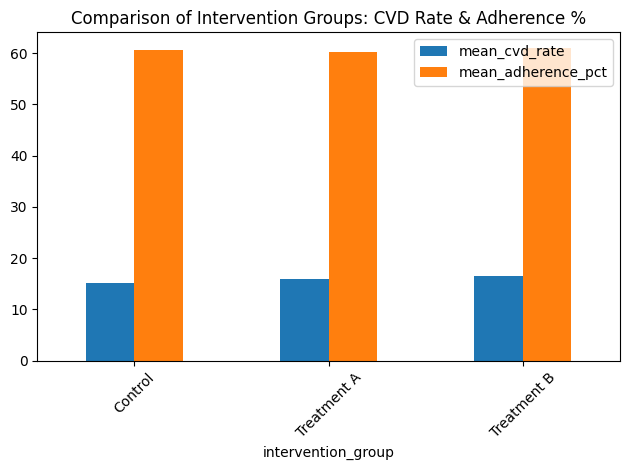

In [7]:
# TODO: Visualization
plot_group_comparison(intervention_summary,
    x_col ='intervention_group',
    y_col =['mean_cvd_rate', 'mean_adherence_pct'],
        title ='Comparison of Intervention Groups: CVD Rate & Adherence %')

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# TODO: Save summary outputs
site_summary.to_csv('output/q7_site_summary.csv', index=False)
intervention_counts.to_csv('output/q7_intervention_counts.csv', index=False)
overall_site_stats.to_csv('output/q7_overall_site_stats.csv', index=False)

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. TODO
2. TODO
3. TODO
